In [1]:
import os
import torch
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms 

import sklearn
import itertools 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import polyhedra as poly
from polyhedra import cx

In [3]:
from importlib import reload
reload(cx)

<module 'polyhedra.cx' from 'C:\\Users\\Marissa\\Documents\\MLProjects\\PolyCXTorch\\polyhedra\\cx.py'>

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Using {} device'.format(device))

Using cpu device


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, architecture):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()

        self.linear_0 = nn.Linear(architecture[0],architecture[1])
        self.relu_0 = nn.ReLU()
        self.linear_1 = nn.Linear(architecture[1],architecture[2])
        self.relu_1 = nn.ReLU()
        self.linear_2 = nn.Linear(architecture[2],architecture[3])


    def forward(self, x):
        x = self.flatten(x)
        
        self.activity_0 = self.linear_0(x) 
        self.activity_1 = self.linear_1(self.relu_0(self.activity_0))
        self.activity_2 = self.linear_2(self.relu_1(self.activity_1))

        return self.activity_0, self.activity_1, self.activity_2

In [ ]:
# class NeuralNetwork(nn.Module):
#     def __init__(self, architecture):
#         super(NeuralNetwork, self).__init__()
#         self.flatten = nn.Flatten()

#         self.linear_0 = nn.Linear(architecture[0],architecture[1])
#         self.relu_0 = nn.ReLU()
#         self.linear_1 = nn.Linear(architecture[1],architecture[2])
#         self.relu_1 = nn.ReLU()
#         self.linear_2 = nn.Linear(architecture[2],architecture[3])


#     def forward(self, x):
#         x = self.flatten(x)
        
#         self.activity_0 = self.linear_0(x) 
#         self.activity_1 = self.linear_1(self.relu_0(self.activity_0))
#         self.activity_2 = self.linear_2(self.relu_1(self.activity_1))

#         return self.activity_0, self.activity_1, self.activity_2

In [20]:
model = NeuralNetwork(architecture=(2,6,6,1)).to(device)

In [21]:
# #first layer 

# points, combos = cx.find_intersections(2,parameters[0],parameters[1])
# pts, ssv = cx.determine_existing_points(points,combos,model)
# ss_dict = {ss: pt for ss, pt in zip(ssv,pts)}
# ssr = cx.get_ssr(ssv,6)

# print(set([ss[0:6] for ss in ssv]), '\n')
# print(len(ssr))

In [22]:
# #second layer 

# new_points, new_ssv = [],[]

# for temp_ssr in ssr:

#     region_maps = cx.get_all_maps_on_region(temp_ssr,1,parameters,architecture)
    
#     last_layer, last_biases = cx.make_linear(region_maps[1])
    
#     early_layer_maps, early_layer_biases = cx.make_linear(region_maps[0])

#     temp_points,temp_combos = cx.find_intersections(2, last_layer, last_biases, 
#                            early_layer_maps=early_layer_maps, 
#                            early_layer_biases=early_layer_biases,
#                            device=None)
    
#     if len(temp_points)>0: 
#         temp_pts, temp_ssv = cx.determine_existing_points(torch.tensor(temp_points),
#                                                           temp_combos,model, region_ss=temp_ssr[0:6])
    
    
    
    
#     #print(temp_pts,temp_ssv)
    
#         new_points.extend(temp_pts)
#         new_ssv.extend(temp_ssv)
        
# newdict = {ss:pt for ss,pt in zip(new_ssv,new_points)}
# ss_dict_final = newdict | ss_dict

In [23]:
# fig = plt.figure(figsize=(5,5))
# #ax=fig.add_subplot(1,1,1,projection='3d')
# ax=fig.add_subplot(1,1,1)

# bound=10

# ax.set_xlim(-bound,bound)
# ax.set_ylim(-bound,bound)
# #ax.set_zlim(-bound,bound)

# colors =['black']*6+['blue']*6+['red']

# cx.plot_complex(ss_dict_final,13,ax=ax,colors=colors)
# #cx.plot_complex(ss_dict,10,ax=ax,colors=['red']*10)
# plt.show()

In [171]:
# def get_full_complex(model, max_depth=None, device=None): 
#     '''assumes model is feedforward and has appropriate structure.
#     Outputs dictionary with vertices' signs and locations of vertices''' 
    
#     if device is None: 
#         device='cpu'
    
#     parameters = list(model.parameters())
    
#     if max_depth is None: 
#         depth = len(parameters)//2 
#     else: 
#         depth = max_depth
    
#     architecture = [parameters[0].shape[1]] #input dimension 
    
#     for i in range(depth): 
#         architecture.append(parameters[2*i].shape[0]) #intermediate dimensions 
        
#     architecture = tuple(architecture) 
    
#     in_dim = architecture[0]
    
#     #get first layer sign sequences.
#     temp_points, temp_combos = cx.find_intersections(in_dim,parameters[0],parameters[1])
    
#     #initialize full list of points, sign sequences, and ss_dict  
#     all_points, all_ssv = cx.determine_existing_points(temp_points,temp_combos,model)
    
#     all_ss_dict = {ss: pt for ss, pt in zip(all_ssv,all_points)}
#     #print(all_points)
#     # get subsequent layer sign sequences 
#     # requires updating points, ssv and ss_dict 
    
#     #loop through layers 
#     for i in range(1, len(architecture)-1):
#         #obtain regions which are present from previous layer 
#         #print(sum(architecture[1:i+1]))
#         ssr = cx.get_ssr(all_ssv,sum(architecture[1:i+1]))
#         print(len(ssr))
#         #initialize placeholder for new points and ssv 
#         new_points, new_ssv = [],[]
#         #print(i)
        
#         #loop through regions from previous layers 
#         for temp_ssr in ssr:
#             #obtain the maps on the region induced by the model 
#             region_maps = cx.get_all_maps_on_region(temp_ssr,i,parameters,architecture)
#             #print(len(region_maps))
#             #obtain the early layer maps as a list  of weights and biases
#             early_layer_maps, early_layer_biases=[],[]
#             for j in range(i):
#                 ll, bb = cx.make_linear(region_maps[j])
#                 early_layer_maps.extend(ll.detach().numpy()) 
#                 early_layer_biases.extend(bb.detach().numpy()) 
                
#             early_layer_maps=torch.tensor(early_layer_maps)
#             early_layer_biases = torch.tensor(early_layer_biases)
            
#             #obtain the last layer map as a list of weights and biases 
#             last_layer, last_biases = cx.make_linear(region_maps[-1])

            
#             #get temporary list of points 
#             temp_points,temp_combos = cx.find_intersections(in_dim, last_layer, last_biases, 
#                                    early_layer_maps=early_layer_maps, 
#                                    early_layer_biases=early_layer_biases,
#                                    device=device)
            
#             #if there's more than one point evaluate the 
#             if len(temp_points)>0: 
#                 temp_pts, temp_ssv = cx.determine_existing_points(torch.tensor(temp_points),
#                                                                   temp_combos,model, region_ss=temp_ssr)

#                 new_points.extend(temp_pts)
#                 new_ssv.extend(temp_ssv)
        
#         #done looping through regions, now collect points 
#         new_points = np.array(new_points)

#         new_ss_dict = {ss:pt for ss,pt in zip(new_ssv,new_points)}
        
#         if len(new_points)>0: 
#             all_points = np.row_stack([all_points,new_points])
#             all_ssv = all_ssv+new_ssv 
#             all_ss_dict = all_ss_dict | new_ss_dict
#         else:
#             pass
    
#     return all_ss_dict, all_points, all_ssv
        
        

In [242]:
reload(cx)

<module 'polyhedra.cx' from 'C:\\Users\\Marissa\\Documents\\MLProjects\\PolyCXTorch\\polyhedra\\cx.py'>

In [243]:
from timeit import default_timer as timer


In [245]:
time_by_size = [] 
sizes = np.array(list(range(3,15)))

for isize in range(3,20):
    
    architecture = (2,isize,isize,1)
    model = NeuralNetwork(architecture=architecture).to(device)
    
    t0 = timer() 
    alldict, allpts, allssv = cx.get_full_complex(model)
    t1 = timer() 
    time_by_size.append(t1-t0)
    #print(isize)


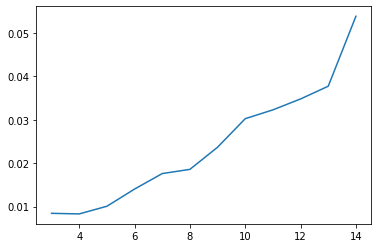

In [253]:
plt.plot(sizes,time_by_size/sizes**2)

<AxesSubplot:>

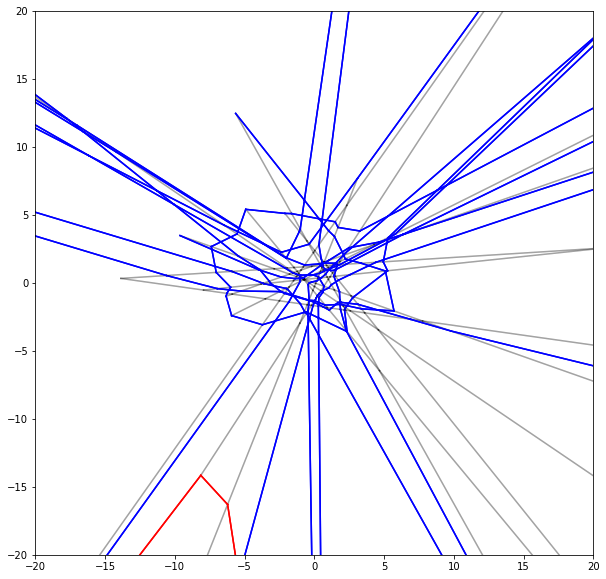

In [241]:
colors = ['black']*architecture[1]+['blue']*architecture[2]+['red']


fig=plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111, projection='3d')
ax=fig.add_subplot(111)

bound = 20

ax.set_xlim(-bound,bound)
ax.set_ylim(-bound,bound)
#ax.set_zlim(-bound,bound)
cx.plot_complex(alldict, 100, colors = colors,ax=ax)

Using cpu device
37
170


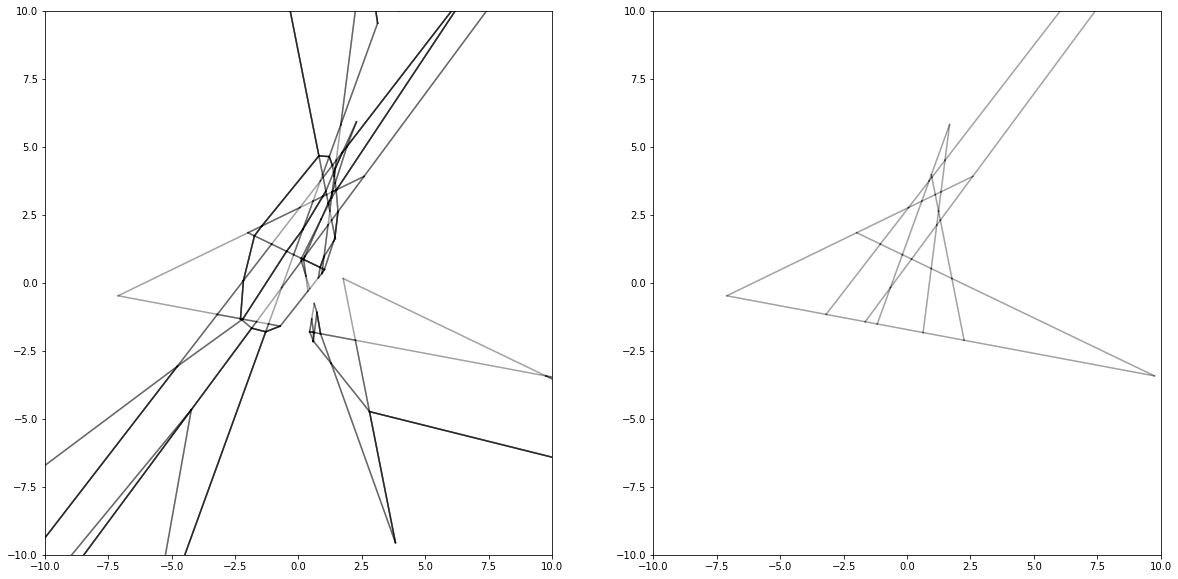

In [169]:
# from polyhedra import old 
# reload(old)
# GOOD_POINTS, GOOD_SS = old.get_full_complex(model,colors=colors)

In [170]:
for k in range(1,2):
    print(k)

1
